In [31]:
import numpy as np;
import matplotlib as mp;
import matplotlib.pyplot as plt;
import matplotlib.patches as patches;
import pandas as pd;
import math;

## Covariance and correlation

Let us calculate the covariance and correlation for real data using Pandas. First we specify the data file name and have a "peek" at the data frame:

In [32]:
data_file = 'ASC_cg_export.tsv';
pd.read_csv(data_file,sep = '\t',low_memory=False)

,patient_id,cg00510787,cg03169527,cg23256971,cg08585897
0,0,0.076000,0.031020,0.681708,0.136734
1,1,0.056540,0.041740,0.309939,0.833063
2,2,0.035931,0.027603,0.336823,0.779083
3,3,0.068871,0.029245,0.637028,0.220080
4,4,0.055457,0.031569,0.648768,0.158911
5,5,0.061143,0.023658,0.642102,0.225108
6,6,0.036393,0.021858,0.590512,0.343928
7,7,0.047970,0.030301,0.208783,0.904000
8,8,0.082713,0.032664,0.636139,0.175850
9,9,0.369641,0.218340,0.648431,0.180848


Now let's actually read the data into a pandas data frame.

In [33]:
data_frame = pd.read_csv(data_file,sep = '\t',low_memory=False);

Let's check the column names:

In [34]:
data_frame.columns

Index(['patient_id', 'cg00510787', 'cg03169527', 'cg23256971', 'cg08585897'], dtype='object')

Before actually calculating the variance-covariance matrix, let's simply look at scatter plots, where we plot the value in a given column as a function of the value in another column.

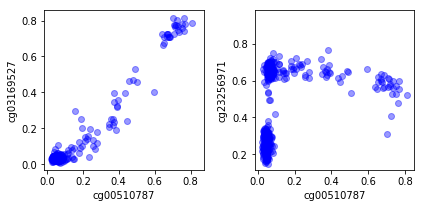

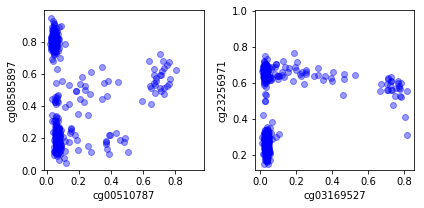

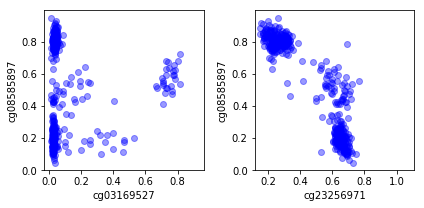

In [35]:
plt.clf();
plt.subplot(121)
plt.plot(data_frame['cg00510787'][:],data_frame['cg03169527'][:],'bo', alpha =0.4);
plt.xlabel('cg00510787');
plt.ylabel('cg03169527');
plt.xlim(0,1);
plt.ylim(0,1);
plt.axis('square');

plt.subplot(122)
plt.plot(data_frame.iloc[:,1],data_frame.iloc[:,3],'bo',alpha = 0.4);
plt.xlabel(data_frame.columns[1]);
plt.ylabel(data_frame.columns[3]);
plt.xlim(0,1);
plt.ylim(0,1);
plt.axis('square');
plt.tight_layout();
plt.show();

plt.clf();
plt.subplot(121)
plt.plot(data_frame.iloc[:,1],data_frame.iloc[:,4],'bo',alpha = 0.4);
plt.xlabel(data_frame.columns[1]);
plt.ylabel(data_frame.columns[4]);
plt.xlim(0,1);
plt.ylim(0,1);
plt.axis('square');

plt.subplot(122)
plt.plot(data_frame.iloc[:,2],data_frame.iloc[:,3],'bo',alpha = 0.4);
plt.xlabel(data_frame.columns[2]);
plt.ylabel(data_frame.columns[3]);
plt.xlim(0,1);
plt.ylim(0,1);
plt.axis('square');
plt.tight_layout();
plt.show();

plt.clf();
plt.subplot(121)
plt.plot(data_frame.iloc[:,2],data_frame.iloc[:,4],'bo',alpha = 0.4);
plt.xlabel(data_frame.columns[2]);
plt.ylabel(data_frame.columns[4]);
plt.xlim(0,1);
plt.ylim(0,1);
plt.axis('square');

plt.subplot(122)
plt.plot(data_frame.iloc[:,3],data_frame.iloc[:,4],'bo',alpha = 0.4);
plt.xlabel(data_frame.columns[3]);
plt.ylabel(data_frame.columns[4]);
plt.xlim(0,1);
plt.ylim(0,1);
plt.axis('square');
plt.tight_layout();
plt.show();

Let's now calculate the co-variance and the correlation matrices.

In [36]:
data_frame.cov()

,patient_id,cg00510787,cg03169527,cg23256971,cg08585897
patient_id,17980.000000,0.178541,0.440353,-1.510975,3.369657
cg00510787,0.178541,0.028208,0.029073,0.010195,-0.005973
cg03169527,0.440353,0.029073,0.031262,0.007102,-0.001742
cg23256971,-1.510975,0.010195,0.007102,0.039455,-0.053103
cg08585897,3.369657,-0.005973,-0.001742,-0.053103,0.083898


In [37]:
data_frame.corr()

,patient_id,cg00510787,cg03169527,cg23256971,cg08585897
patient_id,1.000000,0.007928,0.018565,-0.056703,0.086718
cg00510787,0.007928,1.000000,0.977906,0.305246,-0.122632
cg03169527,0.018565,0.977906,1.000000,0.202212,-0.034015
cg23256971,-0.056703,0.305246,0.202212,1.000000,-0.922989
cg08585897,0.086718,-0.122632,-0.034015,-0.922989,1.000000


Of course, covariance can be calculated also in numpy. To test this, let us first generate a multinomial data set. First we define the parameters of multinomial distribution, $N$ and a couple of $p_i$, where $\sum_i p_i=1$.

In [38]:
N_mn = 20;
p_mn = [0.1,0.2,0.3,0.4];

In [41]:
multinom_data = np.random.multinomial(N_mn,p_mn,10); #first paramater is N, then comes the list of p_i,
                                                                  #finally the number of draws.
print(multinom_data);

[[ 1  6  6  7]
 [ 1  3  5 11]
 [ 2  2  8  8]
 [ 2  3  9  6]
 [ 1  4  5 10]
 [ 4  4  5  7]
 [ 1  5  7  7]
 [ 2  5  4  9]
 [ 1  5  7  7]
 [ 2  5  5  8]]


In [42]:
multinom_data = np.random.multinomial(N_mn,p_mn,10000);
multinom_cov_matr = np.cov(np.transpose(multinom_data));
print(multinom_cov_matr);

[[ 1.77401356 -0.38832619 -0.58972793 -0.79595944]
 [-0.38832619  3.23404596 -1.18890273 -1.65681704]
 [-0.58972793 -1.18890273  4.18704446 -2.4084138 ]
 [-0.79595944 -1.65681704 -2.4084138   4.86119028]]


As a comparison, let's also calculate the theoretical variance-covariance matrix.

In [11]:
theor_cov_matr = [[- N_mn*p_mn[i]*p_mn[j] if j!= i else N_mn*p_mn[i]*(1.0-p_mn[i]) for j in range(0,len(p_mn))] for i in range(0,len(p_mn))];
for line in theor_cov_matr:
    print(line);

[1.8, -0.4, -0.6, -0.8]
[-0.4, 3.2, -1.2, -1.6]
[-0.6000000000000001, -1.2000000000000002, 4.199999999999999, -2.4000000000000004]
[-0.8, -1.6, -2.4, 4.8]


# Inequalities

Let us assume IID Bernoulli random variables such as coin flips, where we do not know the parameter $p$, and only have access to the generated sample.

Our best guess (estimate) for $p$ based on the observed data is given by
\begin{equation}
\widehat{p}=\overline{X_n}=\frac{1}{n}\sum_{i=1}^n x_i.\nonumber
\end{equation}


Hoeffding's inequality states that as $n$ is increased, this estimate is getting exponentialy close to the true value of $p$, since
\begin{equation}
P\left(\left| \overline{X_n}- p\right| \geq \epsilon\right)\leq 2 e^{-2n\epsilon^2}.\nonumber
\end{equation}

Based on that we can construct an interval (called confidence interval) around the estimate $\widehat{p}=\overline{X_n}$ for which we can write down a guaranteed lower bound on the probability that the true $p$ falls within the interval. 

Let us choose the guaranteed lower bound as $1-\alpha$, where $\alpha$ is a parameter. For a fixed $\alpha$, the interval can be given as $\left[\overline{X_n}-\epsilon,\overline{X_n}+\epsilon\right]$ where  
\begin{equation}
\epsilon = \sqrt{\frac{1}{2n}\ln\left(\frac{2}{\alpha}\right)}, \nonumber
\end{equation}
and in such a setting 
\begin{equation}
P\left(\overline{X_n}-\epsilon \leq p \leq \overline{X_n}+\epsilon\right)\geq 1-\alpha.\nonumber
\end{equation}




Let us test this by actually generating Bernoulli random variables and measuring the **coverage** of the above interval, where coverage is the ratio of experiments where the true $p$ did fall into the interval.

First, we define the parameters.

In [26]:
p_true = 0.4;       # the p parameter of the Bernoulli distribution
num_flips = 50;   # the number of data points in one experiment
num_series = 1000;   # the number of experiments.
alpha = 0.05;

Let's just try out generating a small sample.

In [27]:
Bernoulli_samp = list(np.random.choice([1,0],p=[p_true,1.0-p_true],size=10));
print(Bernoulli_samp);

[0, 1, 0, 0, 0, 0, 0, 0, 1, 1]


OK, it seems working, let's now generate the longer samples.

In [28]:
B_series = [list(np.random.choice([1,0],p=[p_true,1.0-p_true],size=num_flips)) for i in range(0,num_series)];

And finally let's see how does the coverage depend on the number of flips. 

In [29]:
cover_list,epsilon_list = [],[];
cover_list.clear();
epsilon_list.clear();
for n in range(1,num_flips):
    epsilon = math.sqrt(math.log(2.0/alpha)*0.5/n);
    epsilon_list.append(epsilon);
    cover_indicator = [ 1 if(abs(p_true - np.mean(B_s[0:n])) < epsilon) else 0 for B_s in B_series];
    coverage = sum(cover_indicator)/len(B_series);
    cover_list.append(coverage);    
    #print('n=',n,'coverage=',coverage);    

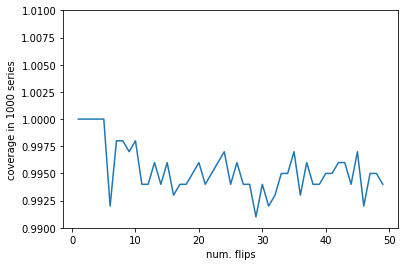

In [30]:
plt.clf();
x_list = range(1,len(cover_list)+1);
plt.plot(x_list,cover_list);
plt.ylim(0.99,1.01);
plt.xlabel('num. flips');
plt.ylabel('coverage in '+str(num_series)+' series');
plt.show();